In [114]:
# ISYE 6740 Homework 1

import numpy as np
import numpy.matlib
from skimage import io
from matplotlib import pyplot as plt
import random
import scipy.misc


In [115]:
#Randomly pick the centroids
def init_centroids(X,K):
    c = random.sample(list(X),K)
    return c

In [116]:
#We use the Euclidian distance to find the closest centroid
#WIKI:In Cartesian coordinates, if p = (p1, p2,..., pn) and q = (q1, q2,..., qn) are 
#two points in Euclidean n-space, then the distance (d) from p to q, or from q to p is given by 
#the Pythagorean formula
def assign_points_to_centroids(X,centroids):
    K = np.size(centroids,0)
    #Each round we use arr to track each points distance from each centroids
    #The array idx will contain index of the centroid with that the point has min distance
    #For each centroid, there is one column. The function argmin picks the min column and return the index (centroid ID)
    idx = np.zeros((np.size(X,0),1))
    arr = np.empty((np.size(X,0),1))

    for i in range(0,K):
        cent = centroids[i] #pick the first centroid
        temp = np.ones((np.size(X,0),1))*cent #the * will replaces 1 with the an array of RGB
        temp = np.power(np.subtract(X,temp),2) #we are using the euclidian distance. do (x-centroid)^2 
        temp = np.sum(temp,axis = 1)#Do the summation of pythagorean formula  
        temp.resize((np.size(X,0),1)) #The np.sum gives horizontal array. We need to resize it.
        #print(np.shape(a))
        arr = np.append(arr, temp, axis=1)
        #print('shape arr for i={} '.format(i), arr.shape)

    arr = np.delete(arr,0,axis=1)
    idx = np.argmin(arr, axis=1) #The np.argmin give horizontal array
    #print('shape of idx at the end ' , np.shape(idx))
    return idx

In [117]:
#This function does the adjustments.
#This is what differs kmeans to kmedoids
def adjust_centroids(X,idx,K):
    n = np.size(X,1) #Number of columns. In our case is always 3 (RGB)
    centroids = np.zeros((K,n))
    for i in range(0,K):
        temp = idx==i #The result will contain T/F values. 
        temp = temp.astype(int) #Let's change the results to 1 and 0. 1 if the point belong to centroid i, 0 otherwise
        total_number = sum(temp); #total number of points. We will use this to calculate the mean of all points
        temp.resize((np.size(X,0),1)) #from array to one long column of ones
        total_matrix = np.matlib.repmat(temp,1,n) #repeat the 1 column three times (RBG)
        #print("total matrix shape: ",total_matrix.shape)
        temp = np.multiply(X,total_matrix) #filter data to only those belong to centroid i
        centroids[i] = (1/total_number)*np.sum(temp,axis=0) #sum each column and divide by total = average.  
    return centroids

In [118]:
#we have two conditions to stop the run. max_iters and if centroid did not change from one itr to another.
def has_converged (old_centroids, new_centroids):
    return set([tuple(x) for x in old_centroids]) == set([tuple(x) for x in new_centroids])

#the main body of the algorithm
def kMean(X,initial_centroids,max_iters):
    m = np.size(X,0) #number of columns. in this case is 3
    n = np.size(X,1) #number of rows
    K = np.size(initial_centroids,0)
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros((m,1))
    for i in range(1,max_iters):
        idx = assign_points_to_centroids(X,centroids)
        centroids = adjust_centroids(X,idx,K)
        if has_converged(previous_centroids, centroids):
            break
            
    return centroids,idx

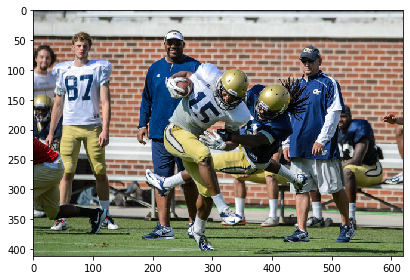

In [119]:
imageName='football.bmp'

image = io.imread(imageName)
io.imshow(image)
io.show()

In [120]:
#We will use this data to reconstruct the image later on
rows = image.shape[0]
cols = image.shape[1]
print('rows x cols = ',rows,'X',cols)

#We can scale the data but I don't see any point to it.
image = image/255

#Let's make the image one long column of three information (RBG) 
#I like to name my data 'data' but looks like in data science world,they always use X
X = image.reshape(image.shape[0]*image.shape[1],3)
#Number of clusters
K = 16 

#Number of times the k-mean should run
#We have two mechanism to stop the run: max_iters and comparison of centroids
max_iters = 50 

initial_centroids = init_centroids(X,K)
centroids,idx = kMean(X,initial_centroids,max_iters)
print('shape of the centroids', np.shape(centroids))
print('shape of index or class', np.shape(idx))

new_X = centroids[idx]
print('shape of the compressed image in one column', np.shape(new_X))
new_X = np.reshape(new_X, (rows, cols, 3))
print('shape of the compressed image in RGB', np.shape(new_X))

rows x cols =  412 X 620
shape of the centroids (16, 3)
shape of index or class (255440,)
shape of the compressed image in one column (255440, 3)
shape of the compressed image in RGB (412, 620, 3)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


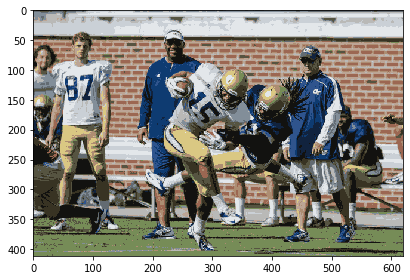

In [121]:
import imageio
imageio.imwrite('kmean'+str(K)+'-'+imageName, new_X)

image_compressed = io.imread('kmean'+str(K)+'-'+imageName)
io.imshow(image_compressed)
io.show()


In [122]:
import os
info = os.stat(imageName)
print("The size of the original image: ",info.st_size/1024,"KB")
info = os.stat('kmean'+str(K)+'-'+imageName)
print("The size of the compressed image: ",info.st_size/1024,"KB")

The size of the original image:  748.412109375 KB
The size of the compressed image:  748.412109375 KB


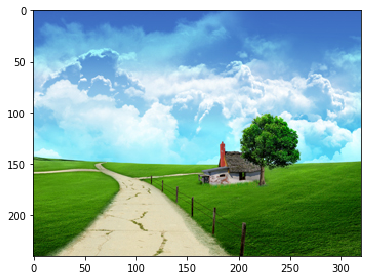

In [123]:
#this is where my experiment with different K starts
imageName='pic.bmp'
image = io.imread(imageName)
io.imshow(image)
io.show()

In [124]:
import time
start = time.time()

rows = image.shape[0]
cols = image.shape[1]
print('rows x cols = ',rows,'X',cols)

image = image/255

X = image.reshape(image.shape[0]*image.shape[1],3)
K = 20 
max_iters = 50 

initial_centroids = init_centroids(X,K)
centroids,idx = kMean(X,initial_centroids,max_iters)
print('shape of the centroids', np.shape(centroids))
print('shape of index or class', np.shape(idx))

new_X = centroids[idx]
print('shape of the compressed image in one column', np.shape(new_X))
new_X = np.reshape(new_X, (rows, cols, 3))
print('shape of the compressed image in RGB', np.shape(new_X))

print ("it took", time.time() - start, "seconds. or ", (time.time() - start)/60)

rows x cols =  240 X 320
shape of the centroids (20, 3)
shape of index or class (76800,)
shape of the compressed image in one column (76800, 3)
shape of the compressed image in RGB (240, 320, 3)
it took 20.147761583328247 seconds. or  0.3357960383097331


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


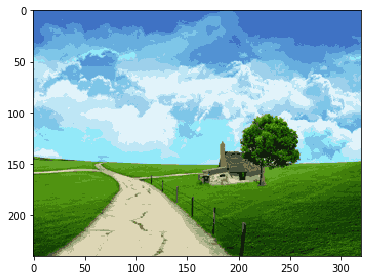

In [125]:
imageio.imwrite('kmean'+str(K)+'-'+imageName, new_X)
image_compressed = io.imread('kmean'+str(K)+'-'+imageName)
io.imshow(image_compressed)
io.show()

In [126]:
info = os.stat(imageName)
print("The size of the original image: ",info.st_size/1024,"KB")
info = os.stat('kmean'+str(K)+'-'+imageName)
print("The size of the compressed image: ",info.st_size/1024,"KB")

The size of the original image:  225.052734375 KB
The size of the compressed image:  225.052734375 KB


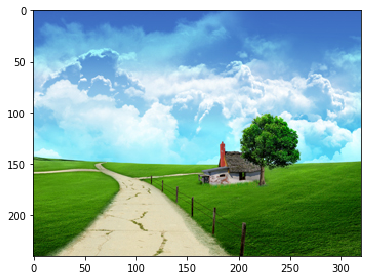

In [127]:
#this is where my experiment with different K starts
imageName='pic.bmp'
image = io.imread(imageName)
io.imshow(image)
io.show()

In [128]:
import time
start = time.time()

rows = image.shape[0]
cols = image.shape[1]
print('rows x cols = ',rows,'X',cols)

image = image/255

X = image.reshape(image.shape[0]*image.shape[1],3)
K = 15 
max_iters = 50 

initial_centroids = init_centroids(X,K)
centroids,idx = kMean(X,initial_centroids,max_iters)
print('shape of the centroids', np.shape(centroids))
print('shape of index or class', np.shape(idx))

new_X = centroids[idx]
print('shape of the compressed image in one column', np.shape(new_X))
new_X = np.reshape(new_X, (rows, cols, 3))
print('shape of the compressed image in RGB', np.shape(new_X))

print ("it took", time.time() - start, "seconds. or ", (time.time() - start)/60)

rows x cols =  240 X 320
shape of the centroids (15, 3)
shape of index or class (76800,)
shape of the compressed image in one column (76800, 3)
shape of the compressed image in RGB (240, 320, 3)
it took 14.948167324066162 seconds. or  0.24913613001505533


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


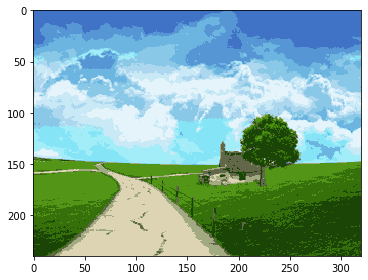

In [129]:
imageio.imwrite('kmean'+str(K)+'-'+imageName, new_X)
image_compressed = io.imread('kmean'+str(K)+'-'+imageName)
io.imshow(image_compressed)
io.show()

In [130]:
info = os.stat(imageName)
print("The size of the original image: ",info.st_size/1024,"KB")
info = os.stat('kmean'+str(K)+'-'+imageName)
print("The size of the compressed image: ",info.st_size/1024,"KB")

The size of the original image:  225.052734375 KB
The size of the compressed image:  225.052734375 KB


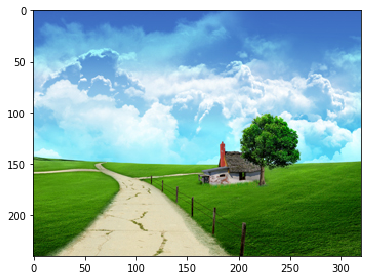

In [131]:
#this is where my experiment with different K starts
imageName='pic.bmp'
image = io.imread(imageName)
io.imshow(image)
io.show()

In [132]:
import time
start = time.time()

rows = image.shape[0]
cols = image.shape[1]
print('rows x cols = ',rows,'X',cols)

image = image/255

X = image.reshape(image.shape[0]*image.shape[1],3)
K = 10 
max_iters = 50 

initial_centroids = init_centroids(X,K)
centroids,idx = kMean(X,initial_centroids,max_iters)
print('shape of the centroids', np.shape(centroids))
print('shape of index or class', np.shape(idx))

new_X = centroids[idx]
print('shape of the compressed image in one column', np.shape(new_X))
new_X = np.reshape(new_X, (rows, cols, 3))
print('shape of the compressed image in RGB', np.shape(new_X))

print ("it took", time.time() - start, "seconds. or ", (time.time() - start)/60)

rows x cols =  240 X 320
shape of the centroids (10, 3)
shape of index or class (76800,)
shape of the compressed image in one column (76800, 3)
shape of the compressed image in RGB (240, 320, 3)
it took 9.946336507797241 seconds. or  0.16577228307723998


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


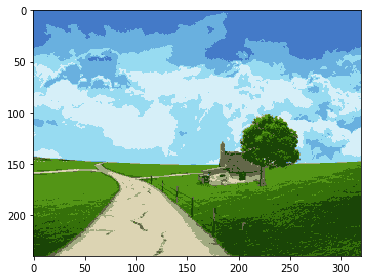

In [133]:
imageio.imwrite('kmean'+str(K)+'-'+imageName, new_X)
image_compressed = io.imread('kmean'+str(K)+'-'+imageName)
io.imshow(image_compressed)
io.show()

In [134]:
info = os.stat(imageName)
print("The size of the original image: ",info.st_size/1024,"KB")
info = os.stat('kmean'+str(K)+'-'+imageName)
print("The size of the compressed image: ",info.st_size/1024,"KB")

The size of the original image:  225.052734375 KB
The size of the compressed image:  225.052734375 KB


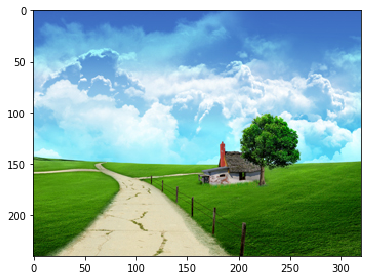

In [135]:
#this is where my experiment with different K starts
imageName='pic.bmp'
image = io.imread(imageName)
io.imshow(image)
io.show()

In [136]:
import time
start = time.time()

rows = image.shape[0]
cols = image.shape[1]
print('rows x cols = ',rows,'X',cols)

image = image/255

X = image.reshape(image.shape[0]*image.shape[1],3)
K = 5 
max_iters = 50 

initial_centroids = init_centroids(X,K)
centroids,idx = kMean(X,initial_centroids,max_iters)
print('shape of the centroids', np.shape(centroids))
print('shape of index or class', np.shape(idx))

new_X = centroids[idx]
print('shape of the compressed image in one column', np.shape(new_X))
new_X = np.reshape(new_X, (rows, cols, 3))
print('shape of the compressed image in RGB', np.shape(new_X))

print ("it took", time.time() - start, "seconds. or ", (time.time() - start)/60)

rows x cols =  240 X 320
shape of the centroids (5, 3)
shape of index or class (76800,)
shape of the compressed image in one column (76800, 3)
shape of the compressed image in RGB (240, 320, 3)
it took 4.844160795211792 seconds. or  0.08073602120081584


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


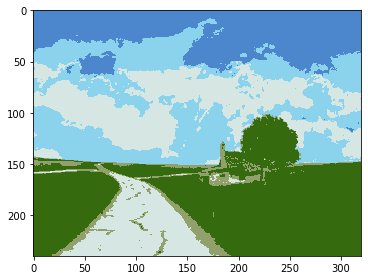

In [137]:
imageio.imwrite('kmean'+str(K)+'-'+imageName, new_X)
image_compressed = io.imread('kmean'+str(K)+'-'+imageName)
io.imshow(image_compressed)
io.show()

In [138]:
info = os.stat(imageName)
print("The size of the original image: ",info.st_size/1024,"KB")
info = os.stat('kmean'+str(K)+'-'+imageName)
print("The size of the compressed image: ",info.st_size/1024,"KB")

The size of the original image:  225.052734375 KB
The size of the compressed image:  225.052734375 KB
